# Multi-instrument Quick Plots
*Written by Sage Lichtenwalner, Rutgers University, June 15, 2018*

In this example, we will demonstrate how to create stacked timeseries plot of multiple instruments using the OOI Synchronous Data Request API.

This is a good way to quickly get a sense of what data is available in the system, and how different instruments roughly compare with each other over time


# Setup
First we will add the libraries, specify the API information, and create some handy functions we will use.

In [0]:
# Load necessary libraries
import requests
import datetime
import matplotlib.pyplot as plt

In [0]:
# API Information
USERNAME =''
TOKEN= ''

DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [0]:
# Time Processing Routines 
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)


# Fluorometers 
Next, let's create some quicklook plots for all fixed Fluorometers in the system.  We will create one plot for the Coastal fluorometers, which are all at the same depth, and a second one for the Global ones, which are at different depths.


In [0]:
# Some FLORTS to plot
# The last column is the depth of the instrument (used in the plots)
coastal_florts = [
  ['CE01ISSM','RID16','02-FLORTD000',7],
  ['CE02SHSM','RID27','02-FLORTD000',7],
  ['CE04OSSM','RID27','02-FLORTD000',7],
  ['CE06ISSM','RID16','02-FLORTD000',7],
  ['CE07SHSM','RID27','02-FLORTD000',7],
  ['CE09OSSM','RID27','02-FLORTD000',7],
  ['CP01CNSM','RID27','02-FLORTD000',7],
  ['CP03ISSM','RID27','02-FLORTD000',7],
  ['CP04OSSM','RID27','02-FLORTD000',7]
]

global_florts = [
  ['GA01SUMO','RID16','02-FLORTD000',12],
  ['GA01SUMO','SBD12','02-FLORTD000',1],
  ['GA03FLMA','RIS01','05-FLORTD000',30],
  ['GA03FLMB','RIS01','05-FLORTD000',30],
  ['GI01SUMO','RID16','02-FLORTD000',12],
  ['GI01SUMO','SBD12','02-FLORTD000',1],
  ['GI03FLMA','RIS01','05-FLORTD000',30],
  ['GI03FLMB','RIS01','05-FLORTD000',30],
  ['GP03FLMA','RIS01','05-FLORTD000',30],
  ['GP03FLMB','RIS01','05-FLORTD000',30],
  ['GS01SUMO','RID16','02-FLORTD000',12],
  ['GS01SUMO','SBD12','02-FLORTD000',1],
  ['GS03FLMA','RIS01','05-FLORTD000',30],
  ['GS03FLMB','RIS01','05-FLORTD000',30],
]


In [0]:
# API URL template for Florometer data
url_template = DATA_API_BASE_URL+\
  '%s/'+\
  '%s/'+\
  '%s/'+\
  'recovered_host/'+\
  'flort_sample'+'?'+\
  'limit=1000'+\
  '&parameters=7,22' # Only get time and fluorometric_chlorophyll_a         

In [0]:
# Crude function to retrieve and reformat synchronous data from the OOI API
def get_data(instruments,parameter):
  out = []
  for jj in range(len(instruments)):
    data_request_url = url_template % (instruments[jj][0],instruments[jj][1],instruments[jj][2])
    r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
    data = r.json()
    print(instruments[jj]) 
    print(len(data))
    time = []
    values = []
    for i in range(len(data)):
      time.append(ntp_seconds_to_datetime(data[i]['time']))
      values.append(data[i][parameter])
    out.append({'time':time,'value':values});
  return out


In [7]:
# Grab the Coastal Fluoromter Data
chl_data = get_data(coastal_florts,'fluorometric_chlorophyll_a')

['CE01ISSM', 'RID16', '02-FLORTD000', 7]
887
['CE02SHSM', 'RID27', '02-FLORTD000', 7]
963
['CE04OSSM', 'RID27', '02-FLORTD000', 7]
992
['CE06ISSM', 'RID16', '02-FLORTD000', 7]
849
['CE07SHSM', 'RID27', '02-FLORTD000', 7]
747
['CE09OSSM', 'RID27', '02-FLORTD000', 7]
632
['CP01CNSM', 'RID27', '02-FLORTD000', 7]
898
['CP03ISSM', 'RID27', '02-FLORTD000', 7]
824
['CP04OSSM', 'RID27', '02-FLORTD000', 7]
863


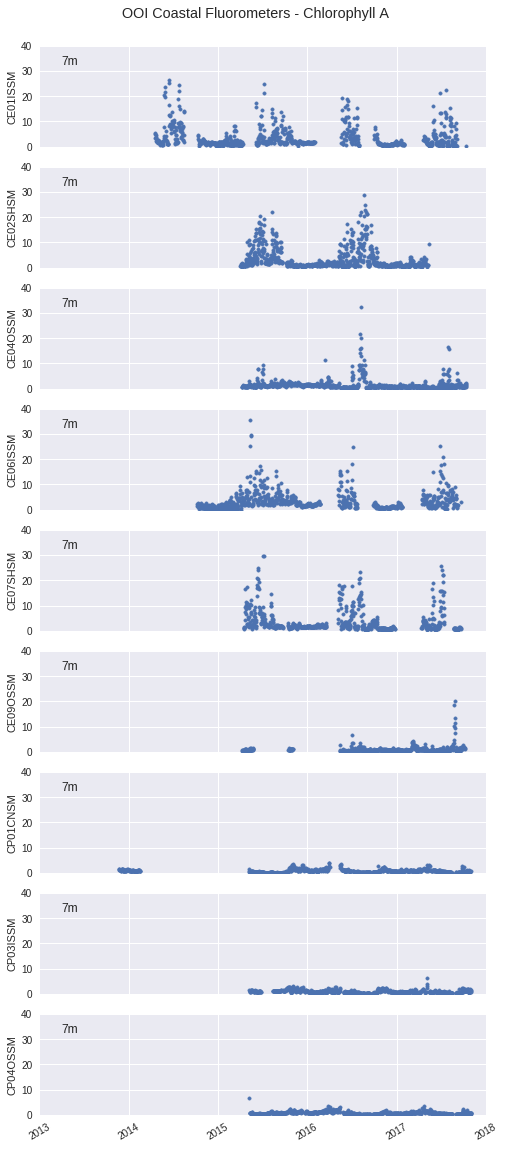

In [8]:
# Plot the Coastal FLORTS
fig, axarr = plt.subplots(len(chl_data), sharex=True, sharey=True, figsize=(8,18))

for jj in range(len(chl_data)):
  axarr[jj].scatter(chl_data[jj]['time'], chl_data[jj]['value'], marker='.')
  axarr[jj].set(ylabel=coastal_florts[jj][0])
  axarr[jj].text(.05, .9, ('%sm' % coastal_florts[jj][3]), horizontalalignment='left', verticalalignment='top', transform=axarr[jj].transAxes)
  
plt.xlim(datetime.date(2013,1,1),datetime.date(2018,1,1))
plt.ylim(0,40)
plt.xticks(rotation=30)
fig.suptitle('OOI Coastal Fluorometers - Chlorophyll A')
fig.subplots_adjust(top=0.95)


In [9]:
# Grab the Global Fluoromter Data
chl_data = get_data(global_florts,'fluorometric_chlorophyll_a')

['GA01SUMO', 'RID16', '02-FLORTD000', 12]
854
['GA01SUMO', 'SBD12', '02-FLORTD000', 1]
745
['GA03FLMA', 'RIS01', '05-FLORTD000', 30]
697
['GA03FLMB', 'RIS01', '05-FLORTD000', 30]
609
['GI01SUMO', 'RID16', '02-FLORTD000', 12]
464
['GI01SUMO', 'SBD12', '02-FLORTD000', 1]
622
['GI03FLMA', 'RIS01', '05-FLORTD000', 30]
786
['GI03FLMB', 'RIS01', '05-FLORTD000', 30]
548
['GP03FLMA', 'RIS01', '05-FLORTD000', 30]
720
['GP03FLMB', 'RIS01', '05-FLORTD000', 30]
861
['GS01SUMO', 'RID16', '02-FLORTD000', 12]
647
['GS01SUMO', 'SBD12', '02-FLORTD000', 1]
813
['GS03FLMA', 'RIS01', '05-FLORTD000', 30]
842
['GS03FLMB', 'RIS01', '05-FLORTD000', 30]
423


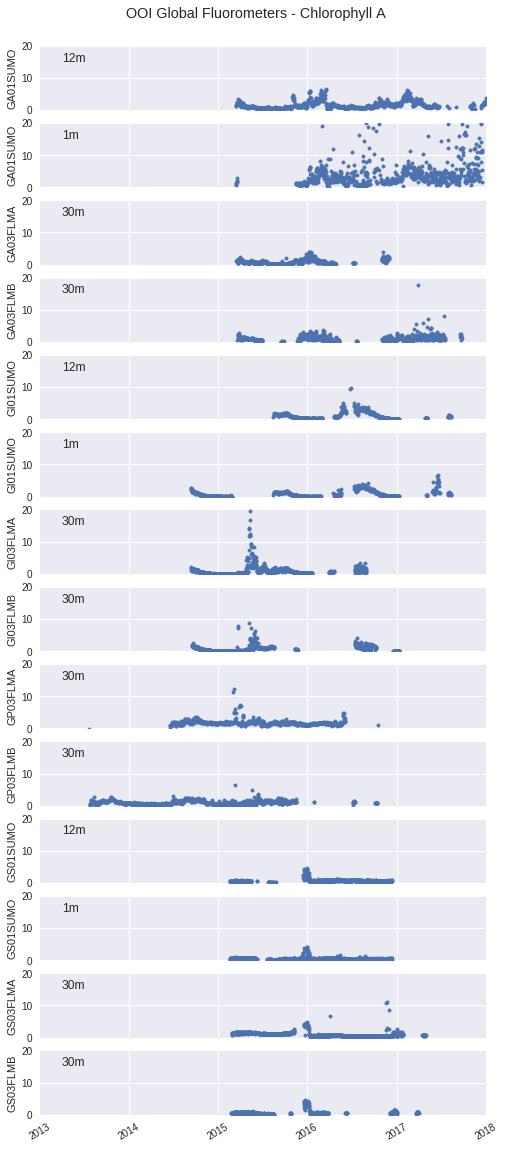

In [10]:
# Plot the Global FLORTS
fig, axarr = plt.subplots(len(chl_data), sharex=True, sharey=True, figsize=(8,18))

for jj in range(len(chl_data)):
  axarr[jj].scatter(chl_data[jj]['time'], chl_data[jj]['value'], marker='.')
  axarr[jj].set(ylabel=global_florts[jj][0])
  axarr[jj].text(.05, .9, ('%sm' % global_florts[jj][3]), horizontalalignment='left', verticalalignment='top', transform=axarr[jj].transAxes)
  
plt.xlim(datetime.date(2013,1,1),datetime.date(2018,1,1))
plt.ylim(0,20)
plt.xticks(rotation=30)
fig.suptitle('OOI Global Fluorometers - Chlorophyll A')
fig.subplots_adjust(top=0.95);


# Nitrate
Another example with Nitrate

In [0]:
# All fixed point Nitrate sensors
nitrate = [
  ['CE01ISSM','RID16','07-NUTNRB000',7],
  ['CE02SHSM','RID26','07-NUTNRB000',7],
  ['CE04OSSM','RID26','07-NUTNRB000',7],
  ['CE06ISSM','RID16','07-NUTNRB000',7],
  ['CE07SHSM','RID26','07-NUTNRB000',7],
  ['CE09OSSM','RID26','07-NUTNRB000',7],
  ['CP01CNSM','RID26','07-NUTNRB000',7],
  ['CP03ISSM','RID26','07-NUTNRB000',7],
  ['CP04OSSM','RID26','07-NUTNRB000',7],
  ['GA01SUMO','RID16','07-NUTNRB000',12],
  ['GA01SUMO','SBD11','08-NUTNRB000',7],
  ['GI01SUMO','RID16','07-NUTNRB000',12],
  ['GI01SUMO','SBD11','08-NUTNRB000',7],
  ['GS01SUMO','RID16','07-NUTNRB000',12],
  ['GS01SUMO','SBD11','08-NUTNRB000',7],
]


In [0]:
# API URL template for Nitrate data
url_template = DATA_API_BASE_URL+\
  '%s/'+\
  '%s/'+\
  '%s/'+\
  'recovered_inst/'+\
  'nutnr_b_instrument_recovered'+'?'+\
  'limit=1000'+\
  '&parameters=7,315,18' # Only get time, nitrate_concentration, salinity_corrected_nitrate         

In [13]:
# Grab the Nitrate data
nitrate_data = get_data(nitrate,'salinity_corrected_nitrate')

['CE01ISSM', 'RID16', '07-NUTNRB000', 7]
689
['CE02SHSM', 'RID26', '07-NUTNRB000', 7]
704
['CE04OSSM', 'RID26', '07-NUTNRB000', 7]
589
['CE06ISSM', 'RID16', '07-NUTNRB000', 7]
498
['CE07SHSM', 'RID26', '07-NUTNRB000', 7]
709
['CE09OSSM', 'RID26', '07-NUTNRB000', 7]
479
['CP01CNSM', 'RID26', '07-NUTNRB000', 7]
386
['CP03ISSM', 'RID26', '07-NUTNRB000', 7]
444
['CP04OSSM', 'RID26', '07-NUTNRB000', 7]
600
['GA01SUMO', 'RID16', '07-NUTNRB000', 12]
719
['GA01SUMO', 'SBD11', '08-NUTNRB000', 7]
770
['GI01SUMO', 'RID16', '07-NUTNRB000', 12]
546
['GI01SUMO', 'SBD11', '08-NUTNRB000', 7]
410
['GS01SUMO', 'RID16', '07-NUTNRB000', 12]
806
['GS01SUMO', 'SBD11', '08-NUTNRB000', 7]
672


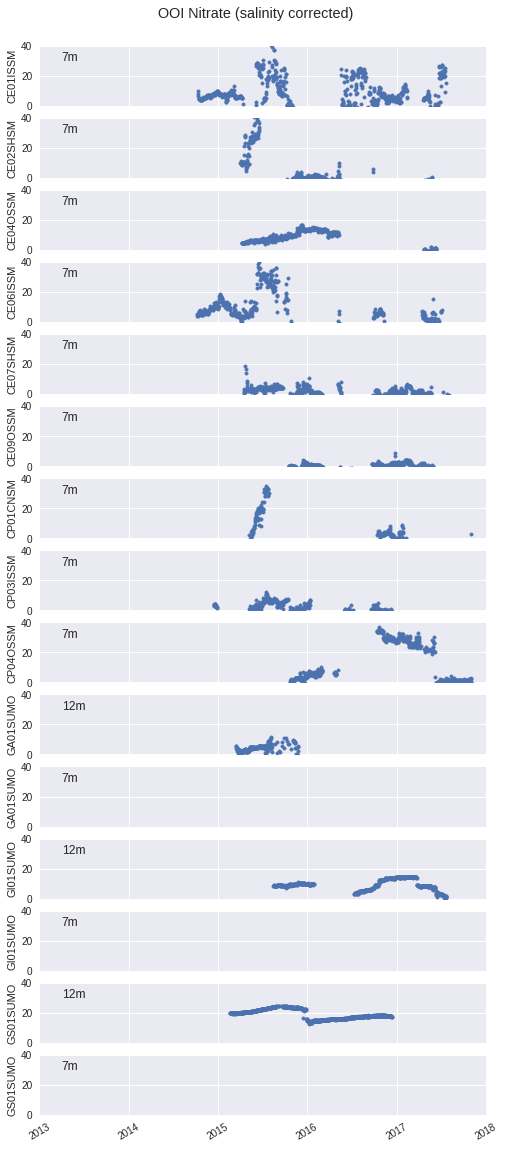

In [14]:
# Plot the Nitrate data
fig, axarr = plt.subplots(len(nitrate_data), sharex=True, sharey=True, figsize=(8,18))

for jj in range(len(nitrate_data)):
  axarr[jj].scatter(nitrate_data[jj]['time'], nitrate_data[jj]['value'], marker='.')
  axarr[jj].set(ylabel=nitrate[jj][0])
  axarr[jj].text(.05, .9, ('%sm' % nitrate[jj][3]), horizontalalignment='left', verticalalignment='top', transform=axarr[jj].transAxes)
  
plt.xlim(datetime.date(2013,1,1),datetime.date(2018,1,1))
plt.ylim(0,40)
plt.xticks(rotation=30)
fig.suptitle('OOI Nitrate (salinity corrected)')
# fig.tight_layout()
fig.subplots_adjust(top=0.95)


# Comparing Chlorophyll and Nitrate
The following script generates a quick plot of Chlorophyll and Nitrate data at 2 locations, one coastal (CE07), one global (GI01).

In [0]:
# Selected Instruments to Plot
instruments = [
  ['CE07SHSM','RID27','02-FLORTD000','recovered_host','flort_sample','fluorometric_chlorophyll_a',7],
  ['CE07SHSM','RID26','07-NUTNRB000','recovered_inst','nutnr_b_instrument_recovered','salinity_corrected_nitrate',7],
  ['GI01SUMO','RID16','02-FLORTD000','recovered_host','flort_sample','fluorometric_chlorophyll_a',12],
  ['GI01SUMO','RID16','07-NUTNRB000','recovered_inst','nutnr_b_instrument_recovered','salinity_corrected_nitrate',12],
]

In [0]:
# Specify additional parameters for the API request 
params = {
  'beginDT':'2015-01-01T00:00:00.000Z',
  'endDT':'2018-01-01T00:00:00.000Z',
  'limit':10000,   
}


In [18]:
# Grab the data for each instrument
out = []
for jj in range(len(instruments)):
  data_request_url ='/'.join((DATA_API_BASE_URL,instruments[jj][0],instruments[jj][1],instruments[jj][2],instruments[jj][3],instruments[jj][4]))
  r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
  data = r.json()
  print(instruments[jj]) 
  print(len(data))
  time = []
  values = []
  for i in range(len(data)):
    time.append(ntp_seconds_to_datetime(data[i]['time']))
    values.append(data[i][instruments[jj][5]])
  out.append({'time':time,'value':values});

['CE07SHSM', 'RID27', '02-FLORTD000', 'recovered_host', 'flort_sample', 'fluorometric_chlorophyll_a', 7]
7380
['CE07SHSM', 'RID26', '07-NUTNRB000', 'recovered_inst', 'nutnr_b_instrument_recovered', 'salinity_corrected_nitrate', 7]
7037
['GI01SUMO', 'RID16', '02-FLORTD000', 'recovered_host', 'flort_sample', 'fluorometric_chlorophyll_a', 12]
6244
['GI01SUMO', 'RID16', '07-NUTNRB000', 'recovered_inst', 'nutnr_b_instrument_recovered', 'salinity_corrected_nitrate', 12]
7088


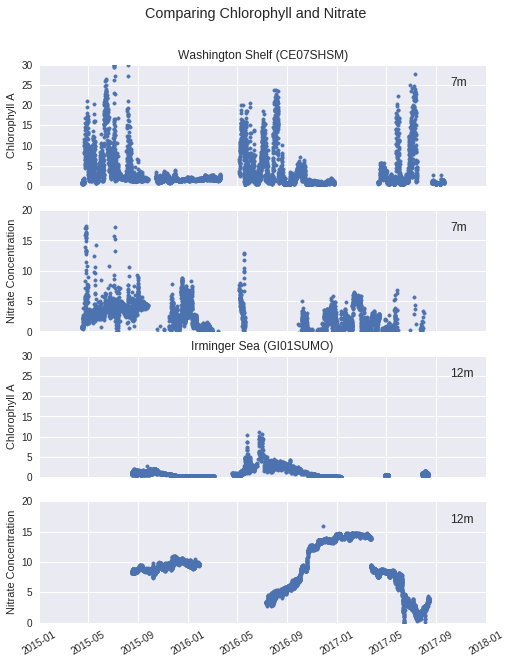

In [19]:
# Plot the data
fig,axs = plt.subplots(len(out), sharex=True, sharey=False, figsize=(8,10))

for jj in range(len(out)):
  axs[jj].scatter(out[jj]['time'], out[jj]['value'], marker='.')
  #axs[jj].set(ylabel=instruments[jj][5])
  #axs[jj].set_title('-'.join(instruments[jj][0:3]))
  axs[jj].text(.92, .9, ('%sm' % instruments[jj][-1]), horizontalalignment='left', verticalalignment='top', transform=axs[jj].transAxes)
  
plt.xlim(datetime.date(2015,1,1),datetime.date(2018,1,1))
plt.xticks(rotation=30)

axs[0].set_ylim(0,30)
axs[1].set_ylim(0,20)
axs[2].set_ylim(0,30)
axs[3].set_ylim(0,20)

axs[0].set_ylabel('Chlorophyll A')
axs[1].set_ylabel('Nitrate Concentration')
axs[2].set_ylabel('Chlorophyll A')
axs[3].set_ylabel('Nitrate Concentration')

axs[0].set_title('Washington Shelf (CE07SHSM)')
axs[2].set_title('Irminger Sea (GI01SUMO)')

fig.suptitle('Comparing Chlorophyll and Nitrate')
fig.subplots_adjust(top=0.9)